# 매수 우위 지수 데이터 분서

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_excel('../data/added_features/서울 월간 매수 우위 지수.xlsx')

In [4]:
df.head()

,조사항목,2000-01-01 09:00:52,2000-02-01 09:00:52,2000-03-01 09:00:52,2000-04-01 09:00:52,2000-05-01 09:00:52,2000-06-01 09:00:52,2000-07-01 09:00:52,2000-08-01 09:00:52,2000-09-01 09:00:52,...,2023-09-01 09:00:52,2023-10-01 09:00:52,2023-11-01 09:00:52,2023-12-01 09:00:52,2024-01-01 09:00:52,2024-02-01 09:00:52,2024-03-01 09:00:52,2024-04-01 09:00:52,2024-05-01 09:00:52,2024-06-01 09:00:52
0,매수자많음 (%),6.6,11.2,9.9,3.1,3.1,3.1,7.2,0.8,6.9,...,4.5,3.2,1.6,1.6,2.2,2.2,2.3,3.1,3.1,8.3
1,비슷함 (%),33.0,22.4,16.8,24.4,28.2,30.3,23.8,30.7,20.6,...,32.4,30.4,22.9,17.4,21.9,21.3,25.1,26.8,25.9,30.5
2,매도자많음 (%),60.3,66.4,73.3,72.5,68.7,66.6,69.0,68.4,72.5,...,63.1,66.4,75.5,80.9,75.9,76.6,72.6,70.1,71.0,61.2
3,매수우위지수,46.3,44.8,36.6,30.6,34.4,36.5,38.1,32.4,34.4,...,41.4,36.9,26.1,20.7,26.3,25.6,29.7,33.0,32.1,47.1


In [5]:
df.drop(['조사항목'], axis=1, inplace=True)

In [9]:
cols = df.columns
cols = [str(col)[:10].replace('-', '')[:6] for col in cols]
cols

['200001',
 '200002',
 '200003',
 '200004',
 '200005',
 '200006',
 '200007',
 '200008',
 '200009',
 '200010',
 '200011',
 '200012',
 '200101',
 '200102',
 '200103',
 '200104',
 '200105',
 '200106',
 '200107',
 '200108',
 '200109',
 '200110',
 '200111',
 '200112',
 '200201',
 '200202',
 '200203',
 '200204',
 '200205',
 '200206',
 '200207',
 '200208',
 '200209',
 '200210',
 '200211',
 '200212',
 '200301',
 '200302',
 '200303',
 '200304',
 '200305',
 '200306',
 '200307',
 '200308',
 '200309',
 '200310',
 '200311',
 '200312',
 '200401',
 '200402',
 '200403',
 '200404',
 '200405',
 '200406',
 '200407',
 '200408',
 '200409',
 '200410',
 '200411',
 '200412',
 '200501',
 '200502',
 '200503',
 '200504',
 '200505',
 '200506',
 '200507',
 '200508',
 '200509',
 '200510',
 '200511',
 '200512',
 '200601',
 '200602',
 '200603',
 '200604',
 '200605',
 '200606',
 '200607',
 '200608',
 '200609',
 '200610',
 '200611',
 '200612',
 '200701',
 '200702',
 '200703',
 '200704',
 '200705',
 '200706',
 '200707',

In [10]:
df.columns = cols
df

,200001,200002,200003,200004,200005,200006,200007,200008,200009,200010,...,202309,202310,202311,202312,202401,202402,202403,202404,202405,202406
0,6.6,11.2,9.9,3.1,3.1,3.1,7.2,0.8,6.9,2.3,...,4.5,3.2,1.6,1.6,2.2,2.2,2.3,3.1,3.1,8.3
1,33.0,22.4,16.8,24.4,28.2,30.3,23.8,30.7,20.6,12.2,...,32.4,30.4,22.9,17.4,21.9,21.3,25.1,26.8,25.9,30.5
2,60.3,66.4,73.3,72.5,68.7,66.6,69.0,68.4,72.5,85.5,...,63.1,66.4,75.5,80.9,75.9,76.6,72.6,70.1,71.0,61.2
3,46.3,44.8,36.6,30.6,34.4,36.5,38.1,32.4,34.4,16.8,...,41.4,36.9,26.1,20.7,26.3,25.6,29.7,33.0,32.1,47.1


In [11]:
df = pd.DataFrame(df.iloc[3])
df.reset_index(inplace=True)
df.columns = ['년도월', '매수우위지수']
df

,년도월,매수우위지수
0,200001,46.3
1,200002,44.8
2,200003,36.6
3,200004,30.6
4,200005,34.4
...,...,...
289,202402,25.6
290,202403,29.7
291,202404,33.0
292,202405,32.1


In [15]:
df['년도월'] = df['년도월'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도월     294 non-null    int64  
 1   매수우위지수  294 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.7 KB


# 시각화

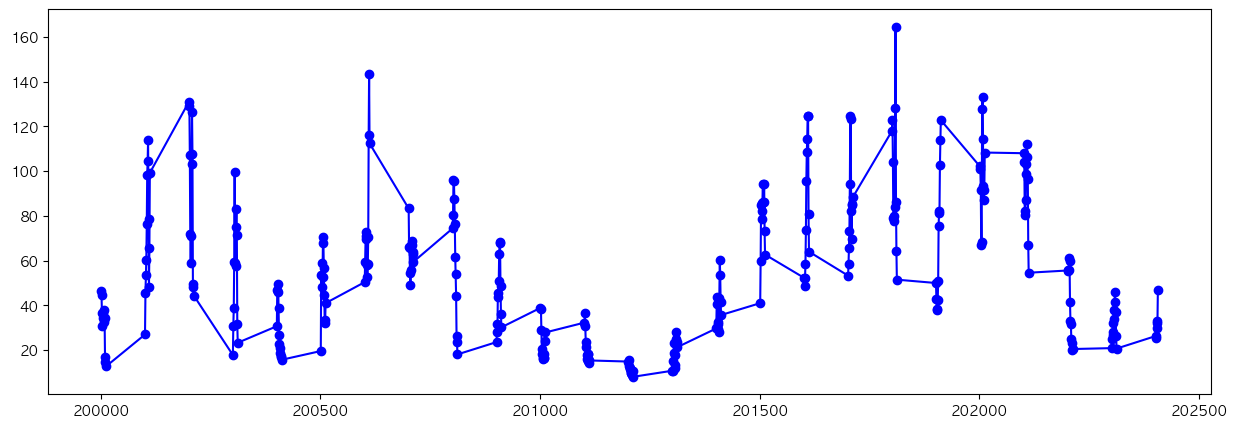

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(df['년도월'], df['매수우위지수'], marker='o', color='b')
plt.show()

# 원본에 적용

In [21]:
origin_df = pd.read_csv('../data/preprocessed/14_init_price.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_78592/1435259543.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  origin_df = pd.read_csv('../data/preprocessed/14_init_price.csv')


In [23]:
origin_df['계약년월']

0          201712
1          201712
2          201712
3          201801
4          201801
            ...  
1128089    202307
1128090    202307
1128091    202308
1128092    202309
1128093    202309
Name: 계약년월, Length: 1128094, dtype: int64

In [24]:
buy_adv_mapping = pd.Series({ym: buy_adv for ym, buy_adv in zip(df['년도월'], df['매수우위지수'])})

origin_df['매수우위지수'] = np.nan
origin_df['매수우위지수'] = origin_df['매수우위지수'].fillna(origin_df['계약년월']).map(buy_adv_mapping)

In [25]:
origin_df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,지가지수,아파트 인허가,미분양,거래량,건설사 랭킹,구,동,구별 지가지수,공시지가 평균,매수우위지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,77.794,74984.0,45.0,13740.0,2.0,강남구,개포동,75.121,6.858562e+06,88.4
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,78.143,32848.0,45.0,15107.0,2.0,강남구,개포동,75.461,7.322618e+06,118.0
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,78.143,32848.0,45.0,15107.0,2.0,강남구,개포동,75.461,7.322618e+06,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,98.993,34043.0,1081.0,6081.0,1.0,중랑구,신내동,99.019,2.963517e+06,38.0
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,98.993,34043.0,1081.0,6081.0,1.0,중랑구,신내동,99.019,2.963517e+06,38.0
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,99.133,34043.0,976.0,6716.0,1.0,중랑구,신내동,99.123,2.963517e+06,46.0
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,99.324,34043.0,914.0,6396.0,1.0,중랑구,신내동,99.328,2.963517e+06,41.4


In [64]:
origin_df.to_csv('../data/preprocessed/15_buy_advantage.csv', index=False)

In [54]:
tmp = pd.DataFrame(origin_df.groupby('계약년월')['target'].mean()).reset_index()
tmp

,계약년월,target
0,200701,27907.070115
1,200702,28687.696452
2,200703,26188.014682
3,200704,29135.020486
4,200705,32721.145273
...,...,...
196,202305,108825.542857
197,202306,111110.622705
198,202307,NaN
199,202308,NaN


In [55]:
tmp2 = df.iloc[84:285]
tmp2.reset_index(inplace=True, drop=True)
tmp2

,년도월,매수우위지수
0,200701,83.3
1,200702,65.9
2,200703,65.5
3,200704,54.4
4,200705,49.2
...,...,...
196,202305,32.2
197,202306,33.8
198,202307,38.0
199,202308,46.0


In [58]:
tmp3 = pd.concat([tmp, tmp2[['매수우위지수']]], axis=1).iloc[:198]
tmp3

,계약년월,target,매수우위지수
0,200701,27907.070115,83.3
1,200702,28687.696452,65.9
2,200703,26188.014682,65.5
3,200704,29135.020486,54.4
4,200705,32721.145273,49.2
...,...,...,...
193,202302,98699.860181,25.1
194,202303,101508.679474,26.7
195,202304,105340.274426,28.2
196,202305,108825.542857,32.2


In [62]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

tmp3['target'] = scaler1.fit_transform(tmp3[['target']])
tmp3['매수우위지수'] = scaler2.fit_transform(tmp3[['매수우위지수']])

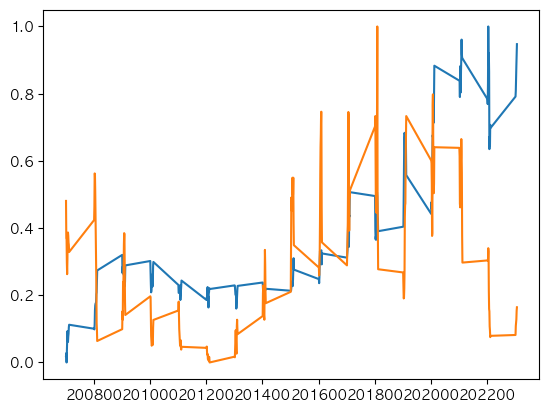

In [63]:
plt.plot(tmp3['계약년월'], tmp3['target'])
plt.plot(tmp3['계약년월'], tmp3['매수우위지수'])